NEW YORK CITY SHORT RENTAL DATA WRANGLING & CLEANING PROJECT

- New York City, one of the most-visited cities in the world. There are many Airbnb
  listings in New York City to meet the high demand for temporary lodging for
  travelers, which can be anywhere between a few nights to many months. 

- In this project, we will take a closer look at the New York Airbnb PILLOW PALOOZA market by combining 
  data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.
  
- These datasets will be 
    - explored 
    - cleaned 
    - wrangled 
    - and transformed for further data analysis process later.  
    
- The dataset:

prices.csv 

- listing_id: unique identifier of listing
- price: nightly listing price in USD
- nbhood_full: name of borough and neighborhood where listing is located

roomtypes.xlsx

- listing_id: unique identifier of listing
- description: listing description
- room_type: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

reviews.tsv

- listing_id: unique identifier of listing
- host_name: name of listing host
- last_review: date when the listing was last reviewed



-----------------------------------------------------------------

IMPORT THE LIBRARIES AND LOAD THE FILES INTO DATAFRAME  

-----------------------------------------------------------------

In [2]:
import pandas as pd 

# load files into dataframes

# read "prices.csv" csv file  

price = pd.read_csv('prices.csv')

#read "reviews.tsv" tsv file 

review = pd.read_csv("reviews.tsv", sep='\t')

# read "roomtypes.xlsx" excel file  

roomtype = pd.read_excel("roomtypes.xlsx", sheet_name= "airbnb_room_type")

-------------------------------------------------------------------------------------

COMPREHENSIVE OVERVIEW OF  "PRICE", "REVIEW" AND "ROOMTYPE" DATAFRAMES 

1. Dimensions of Each DataFrame:
    - Total number of rows and columns in each DataFrame
  

2. Quick Glimpse of Each DataFrame:
    - Display the first few rows of each DataFrame.
      

3. Column Information:
    - Name of the columns, the count of non-null values and the datatype of each column. 
      
-------------------------------------------------------------------------------------

In [3]:
def dataframe_info(price,review,roomtype):
   
    # firts row of each dataframe 
    
    price_df = price.head(1)
    review_df = review.head(1)
    roomtype_df = roomtype.head(1)

    print("First rows of Price DataFrame:")
    print(price_df)
    print("-----------------------------------------------------------")
    print("First rows of Review DataFrame:")
    print(review_df)
    print("-----------------------------------------------------------")
    print("First rows of Roomtype DataFrame:")
    print(roomtype_df)
    

    # Total Rows and Columns in Each Dataframe 
    
    price_size = price.shape
    review_size = review.shape
    roomtype_size = roomtype.shape

    print("Size of Price DataFrame:", price_size)
    print("-----------------------------------------------------------")
    print("Size of Review DataFrame:", review_size)
    print("------------------------------------------------------------")
    print("Size of Roomtype DataFrame:", roomtype_size)

    # Information About Each Dataframes Columns
    
    print("Information of Price DataFrame Columns:",price.info())
    print("Information of Review DataFrame Columns:",review.info())
    print("Information of Roomtype DataFrame Columns:",roomtype.info())
      
    
dataframe_info(price,review,roomtype)

First rows of Price DataFrame:
   listing_id        price         nbhood_full
0        2595  225 dollars  Manhattan, Midtown
-----------------------------------------------------------
First rows of Review DataFrame:
   listing_id host_name  last_review
0        2595  Jennifer  May 21 2019
-----------------------------------------------------------
First rows of Roomtype DataFrame:
   listing_id            description        room_type
0        2595  Skylit Midtown Castle  Entire home/apt
Size of Price DataFrame: (25209, 3)
-----------------------------------------------------------
Size of Review DataFrame: (25209, 3)
------------------------------------------------------------
Size of Roomtype DataFrame: (25209, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2

--------------------------------------------------------------------------------------------------
A STRUCTURED APPROACH TO MERGE  "PRICE", "REVIEW" AND "ROOMTYPE" DATAFRAMES 

1. Identify the Key Column for Merging:

    - The column listing_id has been established as the common key across all three DataFrames. 

2. Ensure Data Type Consistency in the Key Column:

    - Verify that the listing_id column in each DataFrame is of the same data type. Consistent data types are crucial for a successful merge. 

3. Check for Uniqueness of Key Column Values:

    - Confirm that the values in the listing_id column are unique within each DataFrame. 

4. Merge dataframes: Merge dataframes on "listing_id" after validate data consistency and uniqueness. 

----------------------------------------------------------------------------------------------------

In [4]:

# Check the datatypes of "listin_id" in each dataframe

price_key_dtype = price["listing_id"].dtype
review_key_dtype = review["listing_id"].dtype
roomtype_key_dtype = roomtype["listing_id"].dtype

# Check for unique values in "listin_id" in each dataframe

price_key_unique = price["listing_id"].nunique()==len(price)
review_key_unique = review["listing_id"].nunique()==len(review)
roomtype_key_unique = roomtype["listing_id"].nunique()==len(roomtype)

# Checking data type consistency and uniqueness

if price_key_dtype == review_key_dtype == roomtype_key_dtype and price_key_unique and review_key_unique and roomtype_key_unique:
    
    # Merging the DataFrames on 'listing_id'
    
    airbnb = pd.merge(price, review, on='listing_id', how='inner')
    airbnb = pd.merge(airbnb, roomtype, on='listing_id', how='inner')
    print("DataFrames merged successfully.")
    
    # Display the first few rows of the merged dataframe
    
    print(airbnb.head())
else:
    print("DataFrames cannot be merged due to mismatch in data types or non-unique listing_id values.")

DataFrames merged successfully.
   listing_id        price                nbhood_full    host_name  \
0        2595  225 dollars         Manhattan, Midtown     Jennifer   
1        3831   89 dollars     Brooklyn, Clinton Hill  LisaRoxanne   
2        5099  200 dollars     Manhattan, Murray Hill        Chris   
3        5178   79 dollars  Manhattan, Hell's Kitchen     Shunichi   
4        5238  150 dollars       Manhattan, Chinatown          Ben   

    last_review                                description        room_type  
0   May 21 2019                      Skylit Midtown Castle  Entire home/apt  
1  July 05 2019            Cozy Entire Floor of Brownstone  Entire home/apt  
2  June 22 2019  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt  
3  June 24 2019            Large Furnished Room Near B'way     private room  
4  June 09 2019         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt  


-----------------------------------------------------------------------------------

CERTAIN STEPS AND PRECAUTATION BEFORE DATA CLEANING PROCESS 

1. Create a copy of original data.
   
2. Understand the data:
    - Understand what each column represent. 
    - Ensure each column has correct datatype.
3. Identify missing values:
    - Find missing values in dataset. 
4. Detect duplicates:
    - look for and remove any duplicate rows.
-----------------------------------------------------------------------------------

In [5]:
# create a copy of the original data 

airbnb_original = airbnb.copy()

In [6]:

# Indentify missing values 

missing_values = airbnb.isnull().sum()
print('Missing values in column\n',missing_values)

# Detect and remove duplicates 

duplicate_rows = airbnb.duplicated().sum()
print("Number of duplicate rows:",duplicate_rows)

if duplicate_rows >0:
    airbnb.drop_duplicates(inplace=True)


Missing values in column
 listing_id      0
price           0
nbhood_full     0
host_name       8
last_review     0
description    10
room_type       0
dtype: int64
Number of duplicate rows: 0


------------------------------------------------------------

DEFINE OBJECTIVES FOR DATA CLEANING 

1. Handling missing values
2. Standardizing Text and formats
3. Correcting data types 
4. Handling outliers

------------------------------------------------------------

------------------------------------------------------------------------------------

HANDLING MISSING VLAUES 

- 'host_name' column has 8 missing values.
possible actions:
    - Imputation : Imputing missing values with a placeholder like 'unknown'. 
    - Removel: Removing if losing a few rows wont impact the overall anlaysis. 

- 'description'column  has 10 missing values.
possible actions:
    - Imputation : Imputing missing values with a placeholder like 'no description'. 
    - Removel: Removing if losing a few rows wont impact the overall anlaysis.
   
- if mising values are not random removing them migh introduce bias.
    - Consider the nature of missing values determine any pattern. 



-------------------------------------------------------------------------------------

In [7]:
airbnb[airbnb.isnull().any(axis=1)]

,listing_id,price,nbhood_full,host_name,last_review,description,room_type
263,100184,50 dollars,"Queens, Queens Village",NaN,July 08 2019,Bienvenue,private room
3040,4183989,86 dollars,"Manhattan, Harlem",NaN,May 23 2019,SPRING in the City!! Zen-Style Tranquil Bedroom,Private room
4039,6292866,85 dollars,"Brooklyn, East Flatbush",NaN,June 19 2019,Modern Quiet Gem Near All,entire home/apt
4269,6786181,100 dollars,"Brooklyn, East Flatbush",NaN,June 19 2019,R&S Modern Spacious Hideaway,Entire home/apt
4688,7851219,60 dollars,"Brooklyn, Williamsburg",John,June 18 2019,NaN,PRIVATE ROOM
4690,7854307,60 dollars,"Brooklyn, Williamsburg",John,June 15 2019,NaN,private room
4696,7858673,60 dollars,"Brooklyn, Williamsburg",John,June 08 2019,NaN,Private room
4707,7873655,60 dollars,"Brooklyn, Williamsburg",John,June 21 2019,NaN,PRIVATE ROOM
4709,7886635,60 dollars,"Brooklyn, Williamsburg",John,June 18 2019,NaN,Private room
4717,7901635,60 dollars,"Brooklyn, Williamsburg",John,June 23 2019,NaN,Private room


In [8]:
# Remove null values from dataframe airnbn

airbnb = airbnb.dropna(subset = ['host_name','description'])

------------------------------------------------------------------------------------

STANDARDIZE / SPLIT  "nbhood_full" COLUMN 
- it's beneficial to split this column into two distinct columns:
    - Borough: This column will contain  the borough name.
    - Neighborhood: This column will capture the neighborhood within the borough.


-------------------------------------------------------------------------------------

In [9]:
# Spliting 'nbhood_full' into 'borough' and 'neighborhood'

airbnb[['borough', 'neighborhood']] = airbnb['nbhood_full'].str.split(',', n = 1, expand = True)


In [10]:
#  Drop the 'nbhood_full' column 

airbnb.drop('nbhood_full',axis = 1, inplace = True)


--------------------------------------------------------------------------------
STANDARDIZING  'nbhood_full' COLUMN 

- 'Entire home/apt' Variations: Standardize all variations to 'Entire home/apt'.
- 'Private room' Variations: Standardize to 'Private room'.
- 'Shared room' Variations: Standardize to 'Shared room'.
--------------------------------------------------------------------------------

In [11]:
# Standardizing 'Entire home/apt'

airbnb['room_type']= airbnb['room_type'].replace(regex = [r'(?i)^entire home/apt$']
                                                 ,value = 'entire home/apt')

# Standardizing 'Private room'

airbnb['room_type']= airbnb['room_type'].replace(regex = [r'(?i)^private room$'],
                                                 value = 'private room')

# Standardizing 'Shared room'

airbnb['room_type']= airbnb['room_type'].replace(regex = [r'(?i)^shared room$'], 
                                                 value = 'shared room')



In [12]:
airbnb['room_type'].unique()

array(['entire home/apt', 'private room', 'shared room'], dtype=object)

--------------------------------------------------------------

CONVERTING  'price' COLUMN to NUMERIC DATA TYPE

- Remove the non-numeric data type 'dollar' characters etc. 
- Converting the resulting string to float data type 

-------------------------------------------------------------

In [13]:
# Remove the non-numeric characters and convert to float

airbnb['price'] = airbnb['price'].str.replace(' dollars', '').astype(float)



In [14]:
# Check to validate conversion datatype of PRICE column 

airbnb['price'].dtype

dtype('float64')

In [15]:
airbnb.dtypes

listing_id        int64
price           float64
host_name        object
last_review      object
description      object
room_type        object
borough          object
neighborhood     object
dtype: object

-----------------------------------------------------------------------
CONVERTING COLUMNS TO ' CATEGORICAL'  DATATYPES 

- 'room_type' column has 3 unique values:
    - ('entire home/apt', 'private room', 'shared room')
    - Change the column to categorical dataype 

- 'borough' column has 5 unique values;
    - (Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx')
    - Change the column to categorical dataype 
-----------------------------------------------------------------------

In [16]:
#  Converting 'room_type' to categorical

airbnb['room_type'] = airbnb['room_type'].astype('category')

# Converting 'borough' to categorical

airbnb['borough'] = airbnb['borough'].astype('category')

CONVERTING COLUMNS TO ' DATETIME'  DATATYPES 

- Before convert 'last_review' to date format : 

    1. Examine a sample of unique values to visually identify variations in the date format.
    
    2. Use regular expressions to detect common date format to identif entries that do not conform to expected patterns.
    
    

In [17]:
# Display a sample of unique values from 'last_review'

unique_dates = airbnb['last_review'].unique()

print(unique_dates[:10]) 

['May 21 2019' 'July 05 2019' 'June 22 2019' 'June 24 2019' 'June 09 2019'
 'June 23 2019' 'June 29 2019' 'June 28 2019' 'July 01 2019'
 'January 01 2019']


In [18]:
# Regular expression pattern for a specific date format, e.g., "May 21 2019"

date_pattern = r'^[a-zA-Z]+ \d{2} \d{4}$'

# Check which entries do not match the expected pattern

non_matching = airbnb[~airbnb['last_review'].astype(str).str.match(date_pattern)]

print(non_matching['last_review'])

Series([], Name: last_review, dtype: object)


In [19]:
# Convert 'last_review' to datetime

airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], errors='coerce')

# Verify the conversion

print(airbnb['last_review'].head())

0   2019-05-21
1   2019-07-05
2   2019-06-22
3   2019-06-24
4   2019-06-09
Name: last_review, dtype: datetime64[ns]


----------------------------------------------------------------------------

DEALING WITH OUTLIRES IN 'price' COLUMN

- Identfy outliers range with  Interquartile Range (IQR).
- Indentify min and max values 
- Identfy irrelevant outlier values 
- Decide how to handle outliers
    - Remove:If outliers considered errors or irrelevant to analysis. 
    - Retain: If outliers arent considered errors or irrelevant to analysis. 
    - Further analysis: Ouliers might be valuable data points. 
    
----------------------------------------------------------------------------

In [20]:
# Calculate IQR for 'price' column 

Q1 = airbnb['price'].quantile(0.25)
Q3 = airbnb['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers for 'price' column

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for 'price' column 

print("upper bound",upper_bound)
print("lower bound", lower_bound)

# Define mix and min value for 'price' column

print("max value",airbnb['price'].max())
print("min value", airbnb['price'].min())

upper bound 334.0
lower bound -90.0
max value 7500.0
min value 0.0


In [21]:
# Find rows where 'price' is zero in arbnb dataset

airbnb[airbnb['price'] == 0]


,listing_id,price,host_name,last_review,description,room_type,borough,neighborhood
10861,20333471,0.0,Anisha,2019-06-24,‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,private room,Bronx,East Morrisania
10958,20523843,0.0,Martial Loft,2019-05-18,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",private room,Brooklyn,Bushwick
11023,20639628,0.0,Adeyemi,2019-06-15,Spacious comfortable master bedroom with nice ...,private room,Brooklyn,Bedford-Stuyvesant
11024,20639792,0.0,Adeyemi,2019-06-21,Contemporary bedroom in brownstone with nice view,private room,Brooklyn,Bedford-Stuyvesant
11025,20639914,0.0,Adeyemi,2019-06-23,Cozy yet spacious private brownstone bedroom,private room,Brooklyn,Bedford-Stuyvesant
11577,21291569,0.0,Sergii,2019-06-22,Coliving in Brooklyn! Modern design / Shared room,shared room,Brooklyn,Bushwick
11589,21304320,0.0,Sergii,2019-05-24,Best Coliving space ever! Shared room.,shared room,Brooklyn,Bushwick


In [22]:
# define max value in price column 

max_value = airbnb['price'].max()

# Find rows that are close to max vlaue in price column ( %60 of max value)

airbnb[airbnb['price'] >= (max_value * 0.6)]




,listing_id,price,host_name,last_review,description,room_type,borough,neighborhood
18430,30035166,5000.0,Rasmus,2019-02-23,4-Floor Unique Event Space 50P Cap. - #10299B,entire home/apt,Manhattan,Harlem
22085,33397385,5100.0,Debra,2019-06-22,Midtown Manhattan great location (Gramacy park),entire home/apt,Manhattan,Midtown
23916,34895693,7500.0,Sandra,2019-07-07,Gem of east Flatbush,private room,Brooklyn,East Flatbush


------------------------------------------------------------------------------------------

STEPS TO REMOVE IDENTIFIED OUTLIERS 

Remove Zero Values:

- prices of zero are unlikely to be realistic in this context,should be removed. 

Remove Extreme High Value:

- The price of $7,500 for a shared room is anomalously high and should be removed. 

------------------------------------------------------------------------------------------

In [23]:
# Identfy row's index where price is zero 

zero_price = airbnb[airbnb['price'] == 0].index

# Remove zero values from dataframe

airbnb.drop(zero_price, inplace = True)

In [24]:
# Identfy row's index where price is 7500$

zero_price = airbnb[airbnb['price'] == 7500].index

# Remove zero values from dataframe

airbnb.drop(zero_price, inplace = True)

------------------------------------------------  

REMOVE LEADING AND TRAILING WHITESPACE  

------------------------------------------------


In [25]:
# Iterate over each column in the DataFrame

for column in airbnb.columns:
    # Check if the column is of object type (typically string in pandas)
    if airbnb[column].dtype == 'object'and airbnb[column].dtype == 'category':
        airbnb[column] = airbnb[column].str.strip()
# Display the first few rows to confirm the changes
print(airbnb.head(1))

   listing_id  price host_name last_review            description  \
0        2595  225.0  Jennifer  2019-05-21  Skylit Midtown Castle   

         room_type    borough neighborhood  
0  entire home/apt  Manhattan      Midtown  


 -----------------------------------------------------------------------------------------
 ----      STATISTICAL ANALYSIS ---  
 
 -----------------------------------------------------------------------------------------
 

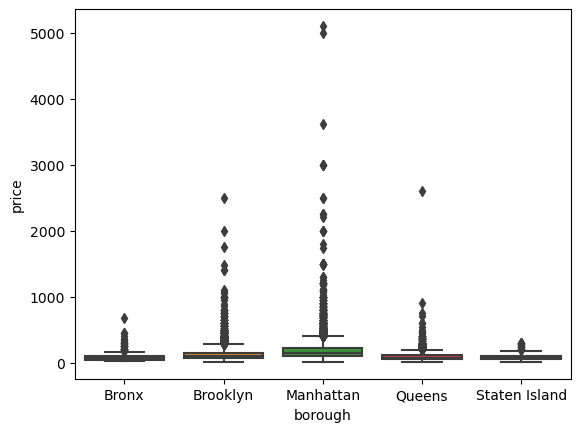

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot boxplot
sns.boxplot(x='borough', y='price', data=airbnb)
plt.show()

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming data is your DataFrame containing 'borough' as string and 'price' as float
# Perform ANOVA
model = ols('price ~ C(borough)', data=airbnb).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

                  sum_sq       df           F  PR(>F)
C(borough)  3.463130e+07      4.0  475.638019     0.0
Residual    4.583038e+08  25178.0         NaN     NaN
